# Part I - (Go-Bike Dataset)
## by Alexis Kurtz

## Introduction
> The Ford Go-Bike dataset contains 183412 records of bike rentals in the bay-area in February 2019 and divided between 16 columns. The dataset gives informations about the attributes of each trips such as the duration, the start and end station (including location data) and about users such as the date of birth or gender.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy.distance import geodesic as GD

%matplotlib inline

gobike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [2]:
# Get a recap of dataset's columns types and data
gobike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [3]:
gobike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
# Get a glimpse of missing data in the dataset
gobike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
gobike_data[gobike_data['member_birth_year']<1920]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.6270,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes
10827,1315,2019-02-27 19:21:34.4360,2019-02-27 19:43:30.0080,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No
16087,1131,2019-02-27 08:37:36.8640,2019-02-27 08:56:28.0220,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No
19375,641,2019-02-26 17:03:19.8550,2019-02-26 17:14:01.6190,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900.0,Male,No
21424,1424,2019-02-26 08:58:02.9040,2019-02-26 09:21:47.7490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,343.0,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.6070,2019-02-03 17:56:42.9490,37.0,2nd St at Folsom St,37.785000,-122.395936,375.0,Grove St at Masonic Ave,37.774836,-122.446546,4988,Subscriber,1900.0,Male,No
173711,993,2019-02-03 09:45:30.4640,2019-02-03 10:02:04.1690,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900.0,Male,No
177708,1527,2019-02-01 19:09:28.3870,2019-02-01 19:34:55.9630,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900.0,Male,No
177885,517,2019-02-01 18:38:40.4710,2019-02-01 18:47:18.3920,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,No


### Wrangling list of issues

- **Quality issues**

1. 'start_time', 'end_time' to convert in date format
2. 'start_station_id' and 'end_station_id' to convert in text, remove '.0'
3. Remove the 197 rows with missing data (in start_station_id/start_station_name/end_station_id/end_station_name)
4. Rename 'duration' in 'duration_sec'
5. Drop rows where calculated 'age' is more than 100
6. Drop too extreme values for distances columns


- **Tidyness issues**

7. Add 2 new columns calculating duration in minutes and hour ('duration_min', 'duration_hour')
8. Add an 'age' field calculated on 'member_birth_year' (based on start_date)
9. Create new columns extracting 'hour of the day', Weekday, Month and Year for both start and end of trip
10. (Iteration) Creation of a new categorical variable 'Weekends'

### Treatment of wrangling issues

In [6]:
# 1 - 'start_time', 'end_time' and 'member_birth_date' to convert in date format
gobike_data['start_time'] = pd.to_datetime(gobike_data['start_time'])
gobike_data['end_time'] = pd.to_datetime(gobike_data['end_time'])
gobike_data['member_birth_year'] = pd.to_datetime(gobike_data['member_birth_year'], format='%Y')

#test

gobike_data[['start_time','end_time','member_birth_year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   start_time         183412 non-null  datetime64[ns]
 1   end_time           183412 non-null  datetime64[ns]
 2   member_birth_year  175147 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 4.2 MB


In [7]:
# 2 - 'start_station_id' and 'end_station_id' to convert in text, remove '.0'
gobike_data['start_station_id'] = gobike_data['start_station_id'].astype(str)
gobike_data['end_station_id'] = gobike_data['end_station_id'].astype(str)

#test
gobike_data[['start_station_id','end_station_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   start_station_id  183412 non-null  object
 1   end_station_id    183412 non-null  object
dtypes: object(2)
memory usage: 2.8+ MB


In [8]:
#get rid of '.0'
gobike_data['start_station_id'] = gobike_data['start_station_id'].str[:-2]
gobike_data['end_station_id'] = gobike_data['end_station_id'].str[:-2]

#test
gobike_data.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No


In [9]:
# 3 - Remove the 197 rows with missing data (in start_station_id/start_station_name/end_station_id/end_station_name)
gobike_data.dropna(subset=['start_station_name'], inplace=True)

#test
gobike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [10]:
# 4 - Rename 'duration' in 'duration_sec'
gobike_data.rename({'duration': 'duration_sec'}, axis='columns')

#test
gobike_data.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No


In [11]:
# 7 - Add 2 new columns calculating duration in minutes and hour ('duration_min', 'duration_hour')

gobike_data['duration_min'] = gobike_data['duration_sec']/60
gobike_data['duration_hour'] = gobike_data['duration_min']/60

#  change column order
col_list = ['duration_sec', 'duration_min', 'duration_hour', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip']

gobike_data = gobike_data.reindex(columns=col_list)

# test
gobike_data.head(1)

,duration_sec,duration_min,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,869.75,14.495833,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No


In [12]:
# 8 - Add an 'age' field calculated on 'member_birth_year' (based on start_date)
gobike_data['age'] = (gobike_data['start_time'].dt.year - gobike_data['member_birth_year'].dt.year)

# test
gobike_data.head(1)

,duration_sec,duration_min,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,869.75,14.495833,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No,35.0


In [13]:
# 5 - Drop rows where calculated 'age' is more than 100
gobike_data = gobike_data.query('age < 100')

# test
(gobike_data.age>100).sum()

0

In [14]:
# 6 - Drop too extreme values for distances columns

gobike_data = gobike_data.query('duration_min < 300')

# test
(gobike_data.duration_min>300).sum()

0

In [15]:
# 9 - Create new columns 'start_hour', 'end_hour', 'start_weekday', 'end_weekday'
gobike_data['start_hour'] = gobike_data['start_time'].dt.hour
gobike_data['end_hour'] = gobike_data['end_time'].dt.hour
gobike_data['start_weekday'] = gobike_data['start_time'].dt.day_name()
gobike_data['end_weekday'] = gobike_data['end_time'].dt.day_name()
gobike_data['start_date'] = gobike_data['start_time'].dt.date

gobike_data[['start_hour', 'end_hour', 'start_weekday', 'end_weekday', 'start_date']].head(1)

,start_hour,end_hour,start_weekday,end_weekday,start_date
4,23,0,Thursday,Friday,2019-02-28


In [16]:
# - 10 (Iteration) Creation of a new categorical variable 'Weekends'

weekend= []
for row in gobike_data['start_weekday']:
        if row == 'Monday' :    weekend.append('Business days')
        elif row == 'Tuesday':   weekend.append('Business days')
        elif row == 'Wednesday' :  weekend.append('Business days')
        elif row == 'Thursday' :  weekend.append('Business days')
        elif row == 'Friday' :  weekend.append('Business days')
        else:           weekend.append('Weekend')

gobike_data['weekday'] = weekend
gobike_data.head()

,duration_sec,duration_min,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,member_birth_year,member_gender,bike_share_for_all_trip,age,start_hour,end_hour,start_weekday,end_weekday,start_date,weekday
4,1585,26.416667,0.440278,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,...,1974-01-01,Male,Yes,45.0,23,0,Thursday,Friday,2019-02-28,Business days
5,1793,29.883333,0.498056,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,...,1959-01-01,Male,No,60.0,23,0,Thursday,Friday,2019-02-28,Business days
6,1147,19.116667,0.318611,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,...,1983-01-01,Female,No,36.0,23,0,Thursday,Friday,2019-02-28,Business days
7,1615,26.916667,0.448611,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.795393,-122.404770,127,...,1989-01-01,Male,No,30.0,23,0,Thursday,Friday,2019-02-28,Business days
8,1570,26.166667,0.436111,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.795393,-122.404770,127,...,1988-01-01,Other,No,31.0,23,0,Thursday,Friday,2019-02-28,Business days


In [17]:
# Save copies of the dataset
gobike_data_copy = gobike_data.copy()

In [18]:
# Save the dataset to an updated csv (for use in part II)

gobike_data_copy.to_csv('201902-fordgobike-tripdata_updated.csv')

### What is the structure of your dataset?

> The Go Bike dataset consists of 174880 individual bike rentals entries from February 1st and 28th 2019 which records :<br>
> - **Duration** of the trip in seconds
> - **Start and End** timestamps (date/hour)
> - **Start and End Stations** names, gps coordinates and id
> - **Bike id** number
> - **Type of user** (whether the user is a subscriber or not)
> - Various personal data (**Gender** / **Birth Year**)
> - **Bike share for all trip** which is an affordable pricing plan option<br>
>
> Were also added the following columns :
>
> - **Duration in minutes and hours**
> - Calculated **Age** of user
> - **Starting and Ending** hour of rental
> - **Weekday** of rental
>
> The dataset can be defined as 'tidy' (each variable being a column, each observation being a row and each obsevational unit a table).

### What is/are the main feature(s) of interest in your dataset?

> I am mainly interested in how the main quatitative characteristic of trips given by the dataset; its duration, is affected by other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> My variables 'of choice' in this dataset are mostly categorical such as the weekday; to see if there is an impact on trip duration, the age or gender of the user and whether or not the user is a subscriber.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

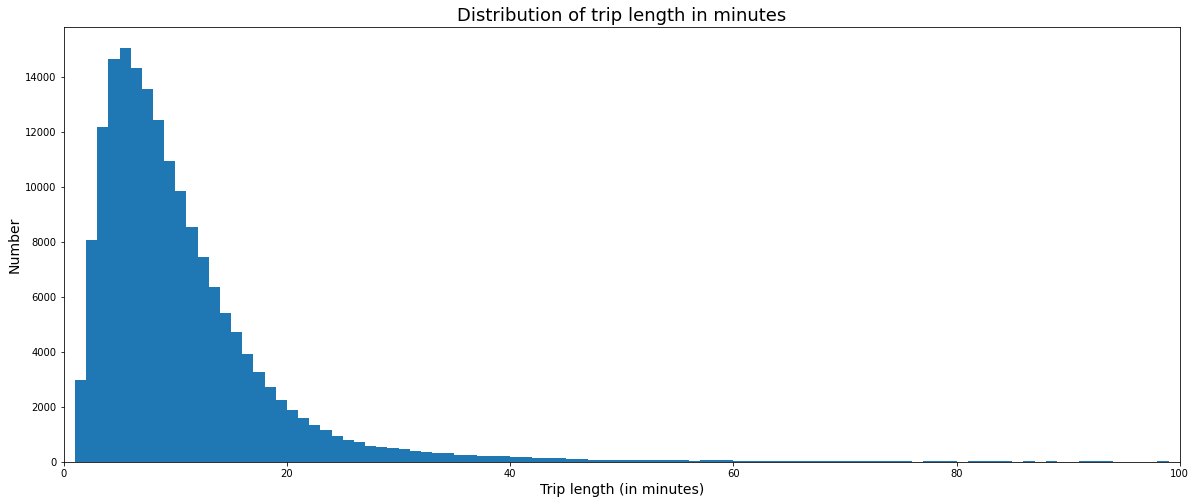

In [35]:
# Plotting of duration in minutes

binsize=1
bins = np.arange(0,gobike_data['duration_min'].max()+binsize, binsize)

plt.figure(figsize=(20,8))

plt.hist(data=gobike_data, x='duration_min', bins=bins)

plt.title('Distribution of trip length in minutes', size=(18))
plt.xlabel('Trip length (in minutes)', size=14)
plt.ylabel('Number', size=14)
plt.xlim(0,100);

The distribution of trip durations in minutes seems to be **Right-skewed** at first **with a peak between 0 and approx. 10/15 minutes.**<br>
Nonetheless, the linear scale is not the best to show the detailed distribution here.

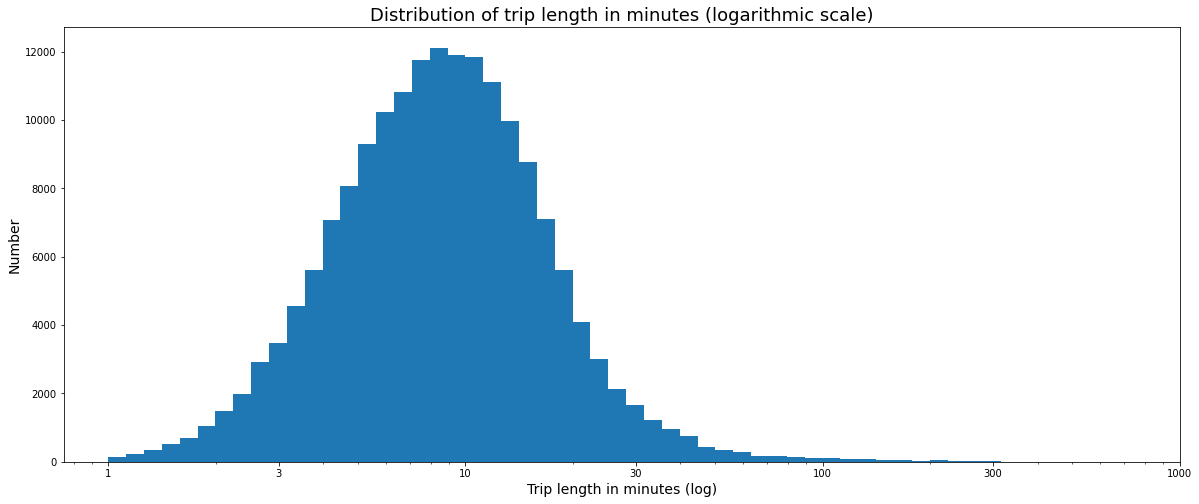

In [20]:
# Plotting of duration in minutes

log_binsize = 0.05
log_bins = 10 ** np.arange(0, 2.50 + log_binsize, log_binsize)

ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(20,8))

plt.hist(data=gobike_data, x='duration_min', bins=log_bins)
plt.xscale('log')
plt.title('Distribution of trip length in minutes (logarithmic scale)', size=(18))
plt.xlabel('Trip length in minutes (log)', size=14)
plt.ylabel('Number of trips', size=14)
plt.xticks(ticks, labels);

A new look at the distribution of trip lengths in minutes, this time with a logarithmic scale provides us a detailed vision of the distribution.<br>
The bell shaped distribution shows that **the majority of trips are between 3 and 30 minutes, with a peak at 9/10 minutes.**

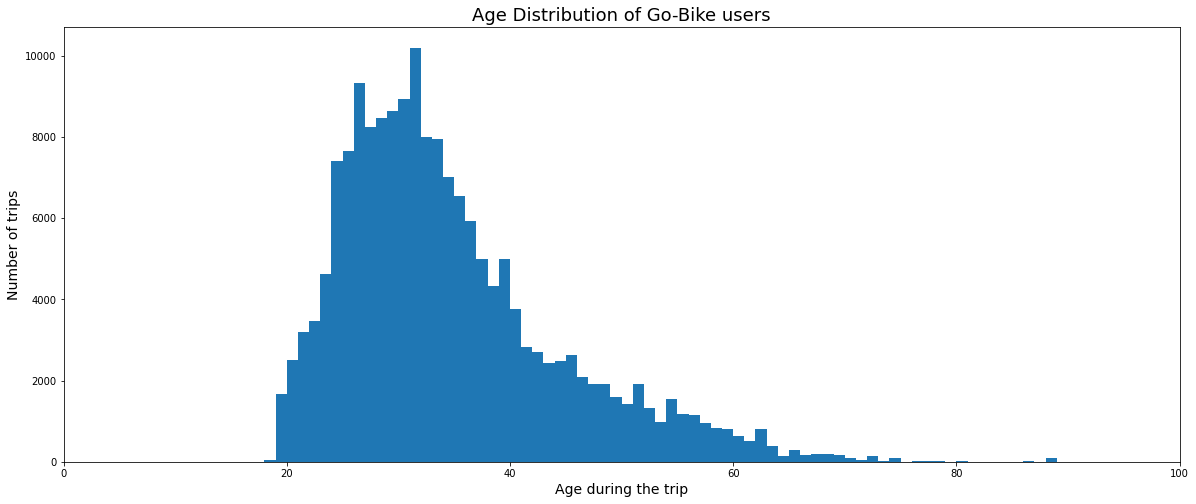

In [36]:
# Plotting of user ages distribution

bins=np.arange(18,99+1,1)

plt.figure(figsize=(20,8))
plt.hist(data=gobike_data, x='age',bins=bins);

plt.title('Age Distribution of Go-Bike users', size=(18))
plt.xlabel('Age during the trip', size=14)
plt.ylabel('Number of trips', size=14)
plt.xlim(0,100);

We can observe a right skewed distribution of the age of Go-Bike users, with a peak near 20-40 years old.
<br>This means **a majority of the users are less than 40 years old**.

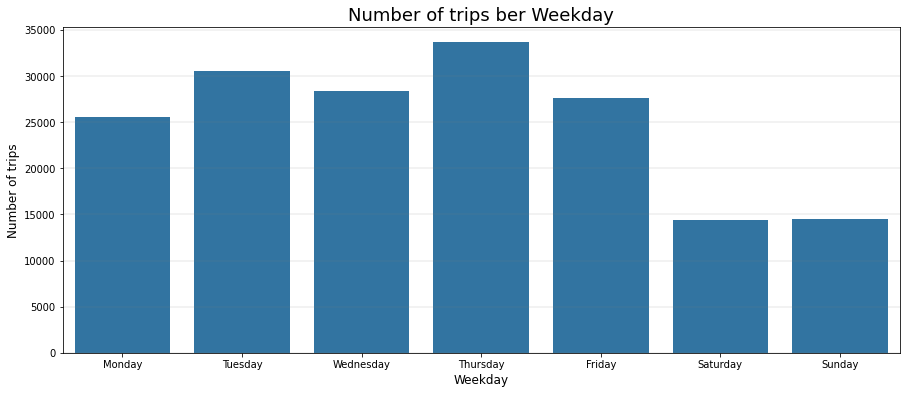

In [22]:
# Number of trips per Week Day

plt.figure(figsize=(15,6))

color = sb.color_palette()[0]
sb.countplot(data=gobike_data, x='start_weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color=color)

plt.title('Number of trips ber Weekday', size=(18))
plt.xlabel('Weekday', size=12)
plt.ylabel('Number of trips', size=12)
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2);

This chart shows that users **make significantly less trips in weekends** than business days. <br>With approximately 15000 trips in Saturdays and Sundays, this is well behind the other days of the week, having at least 25000 trips a day (with a peak at 33000 on Thursdays).

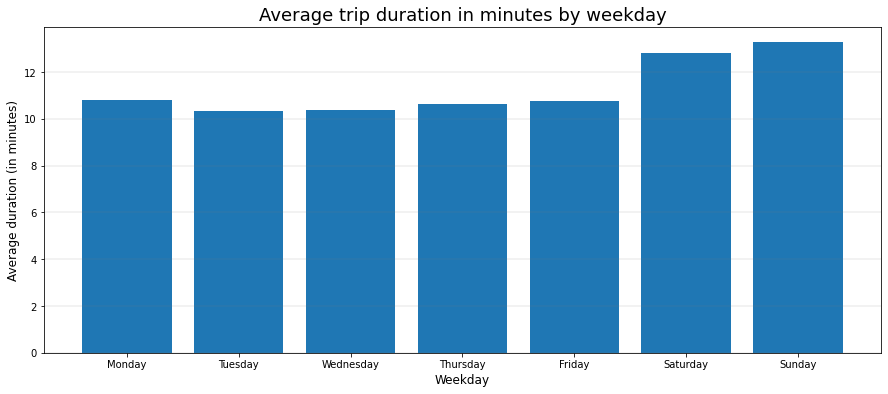

In [37]:
# Average trip duration in minutes by Weekday

plt.figure(figsize=(15,6))
avg_min_duration_weekday = gobike_data.groupby('start_weekday')['duration_min'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

plt.bar(avg_min_duration_weekday['start_weekday'],avg_min_duration_weekday['duration_min'], color='#1f77b4')

plt.title('Average trip duration in minutes by weekday', size=(18))
plt.xlabel('Weekday', size=12)
plt.ylabel('Average duration (in minutes)', size=12)
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2);

Though the amount of trips are more important in week days compared to weekends (as seen previously), **they seem to be longer on average on Sundays and Saturdays** (approx. 2/3 minutes more on average).

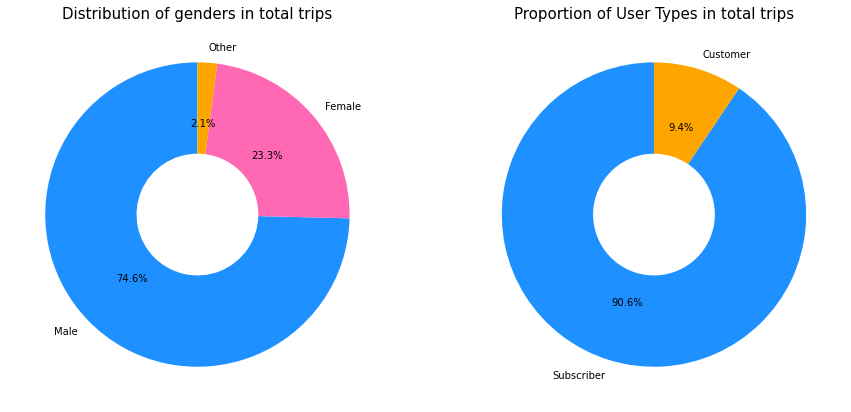

In [24]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
prop_mf = gobike_data.value_counts('member_gender')
plt.pie(prop_mf, labels=prop_mf.index, startangle=90, colors=('dodgerblue', 'hotpink', 'orange'), wedgeprops={'width':0.6}, autopct='%1.1f%%',pctdistance=0.6)
plt.title('Distribution of genders in total trips', size=(15));


plt.subplot(1,2,2)
prop_user_type = gobike_data.value_counts('user_type')
plt.pie(prop_user_type, labels=prop_user_type.index, startangle=90, colors=('dodgerblue', 'orange'), wedgeprops={'width':0.6}, autopct='%1.1f%%',pctdistance=0.6)
plt.title('Proportion of User Types in total trips', size=(15));

Two trends can be observed about the dataset :<br>
- The users are **in majority Males** (approx. 3/4 of total)
- A vast majority (9/10th) of the users **are Subscribers** to GoBike

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> This first part of our analysis told us more about the most common profile of a go bike user; usually male, sbscriber to the service and below its 40's.
> We were also able to find first signs on how weekdays might impact trip habits; as less but longer trips occur on weekends and shorter but more on Business days.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> THe distribution of trip durations had to be plotted on a logarithmic scale to reveal more precisely the nuances of its distribution.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

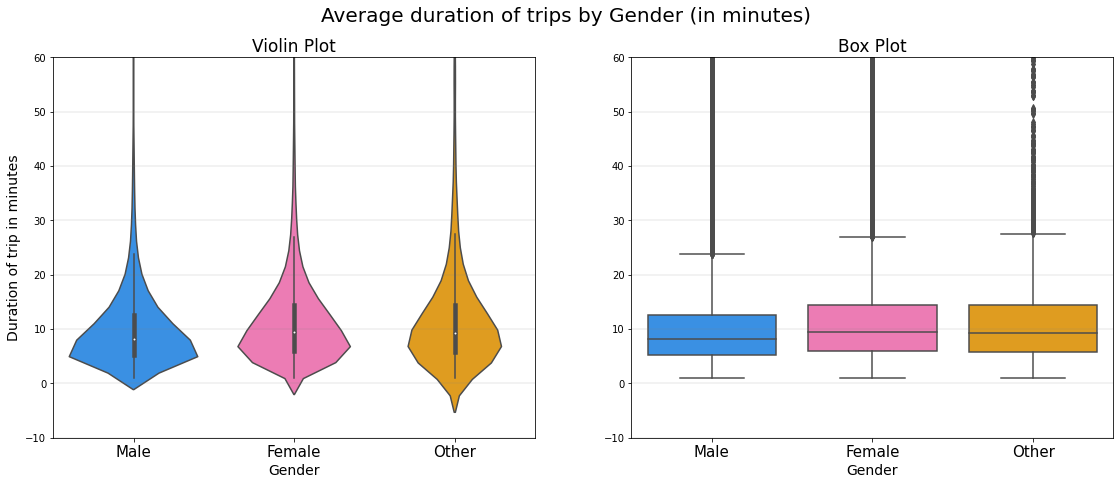

In [40]:
# Plot of Gender vs/duration in minutes

plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
plt.suptitle('Average duration of trips by Gender (in minutes)', size=20) 

gen_palette = {"Male": "dodgerblue", "Female": "hotpink", "Other": "orange"}
sb.violinplot(data=gobike_data, x='member_gender',y='duration_min', palette=gen_palette)
plt.ylim(bottom=-10,top=60)
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2)
plt.title('Violin Plot', size=17)
plt.xlabel('Gender', size=14)
plt.ylabel('Duration of trip in minutes', size=14)
plt.xticks(size=15)

plt.subplot(1,2,2)

sb.boxplot(data=gobike_data, x='member_gender',y='duration_min', palette=gen_palette)
plt.ylim(bottom=-10,top=60)
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2)
plt.title('Box Plot', size=17)
plt.xlabel('Gender', size= 14)
plt.ylabel('')
plt.xticks(size=15);

The above plots show that all genders have a rather similar average trip durations. It is interesting because we saw earlier that typical users of the services were in 3/4 Males. It would suggest that gender doesn't impact much how long the trips are.

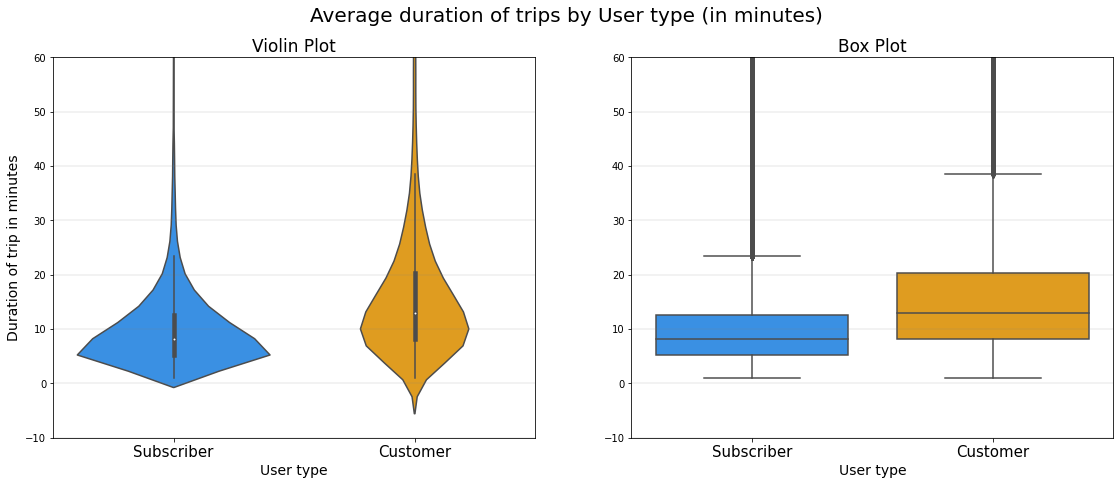

In [41]:
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
plt.suptitle('Average duration of trips by User type (in minutes)', size=20) 

utype_palette = {"Subscriber": "dodgerblue", "Customer": "orange"}
sb.violinplot(data=gobike_data, x='user_type',y='duration_min', palette=utype_palette)
plt.ylim(bottom=-10,top=60)
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2)
plt.title('Violin Plot', size=17)
plt.xlabel('User type', size= 14)
plt.ylabel('Duration of trip in minutes', size= 14)
plt.xticks(size=15)

plt.subplot(1,2,2)

sb.boxplot(data=gobike_data, x='user_type',y='duration_min', palette=utype_palette)
plt.ylim(bottom=-10,top=60)
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2)
plt.title('Box Plot', size=17)
plt.xlabel('User type', size= 14)
plt.ylabel('')
plt.xticks(size=15);

The above plots show **that Customers have a Median of trip duration higher than the 3rd quartile of Subscribers**. It suggests that user type have a impact on trip durations (Customer's trip duration is higher in average than Subscriber's to the service)

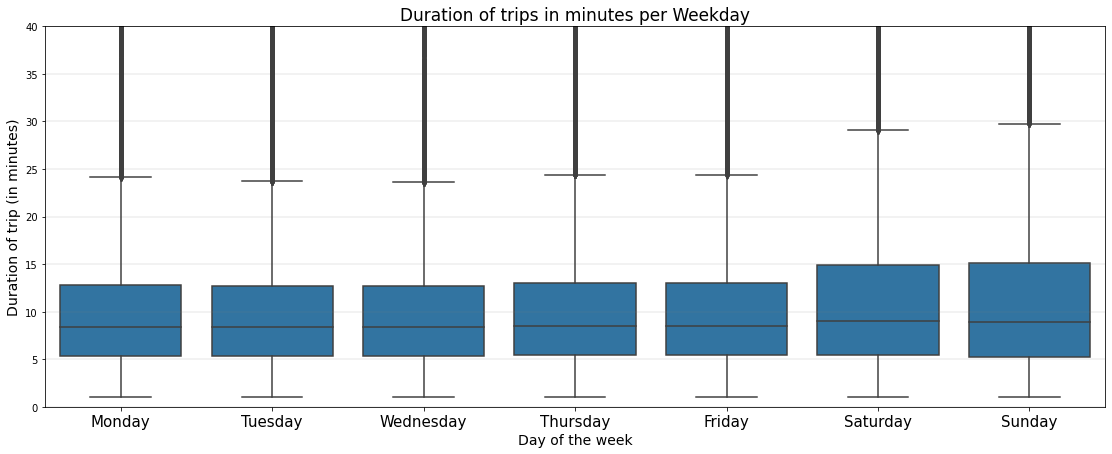

In [43]:
# Plot of Weekday vs/duration in minutes

plt.figure(figsize=(19,7))

color = sb.color_palette()[0]
sb.boxplot(data=gobike_data, x='start_weekday',y='duration_min',order=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color=color)
plt.ylim(bottom=0,top=40)
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2)
plt.title('Duration of trips in minutes per Weekday', size=17)
plt.xticks(size=15)
plt.xlabel('Day of the week', size= 14)
plt.ylabel('Duration of trip (in minutes)', size= 14);

This boxplot suggests again the impact of Weekday on trip duration; Business days have a rather **constant trend** (majority of trips between 5 and 12 minutes) while **Weekends have are somewhat different with a bigger variety in trips length.**

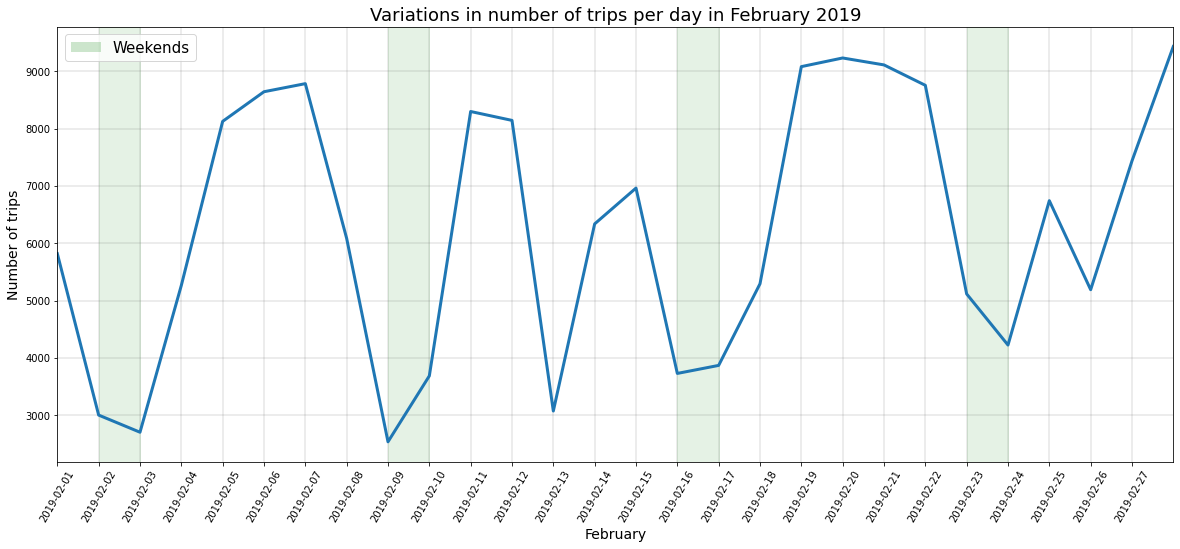

In [44]:
from matplotlib.patches import Patch

daily_trips_count = gobike_data.value_counts('start_date')
daily_trips_count.plot(kind='line', figsize=(20,8), linewidth=3)


plt.title('Variations in number of trips per day in February 2019', size=(18))
plt.xlabel('February',size=(14))
plt.ylabel('Number of trips',size=(14))

x = np.arange(gobike_data['start_date'].min(), gobike_data['start_date'].max(), 1)
plt.xticks(x, rotation = 60)
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.xlim(gobike_data['start_date'].min(), gobike_data['start_date'].max())

plt.axvspan('2019-02-02', '2019-02-03', label="2009 Recession",color="green", alpha=0.1)
plt.axvspan('2019-02-09', '2019-02-10', label="2009 Recession",color="green", alpha=0.1)
plt.axvspan('2019-02-16', '2019-02-17', label="2009 Recession",color="green", alpha=0.1)
plt.axvspan('2019-02-23', '2019-02-24', label="2009 Recession",color="green", alpha=0.1)

plt.legend(handles=[Patch(facecolor='green',label='Weekends',alpha=0.2)],fontsize=15, loc=2);

This Line plot highlight once more the **trend of having less trips on weekends**, but this time **over the course of the full month of February**, which shows that **this trend repeats over time.** <br>

Also visible here; two drops in volume of trips for 02/13 and 02/26 caused by a different factor.

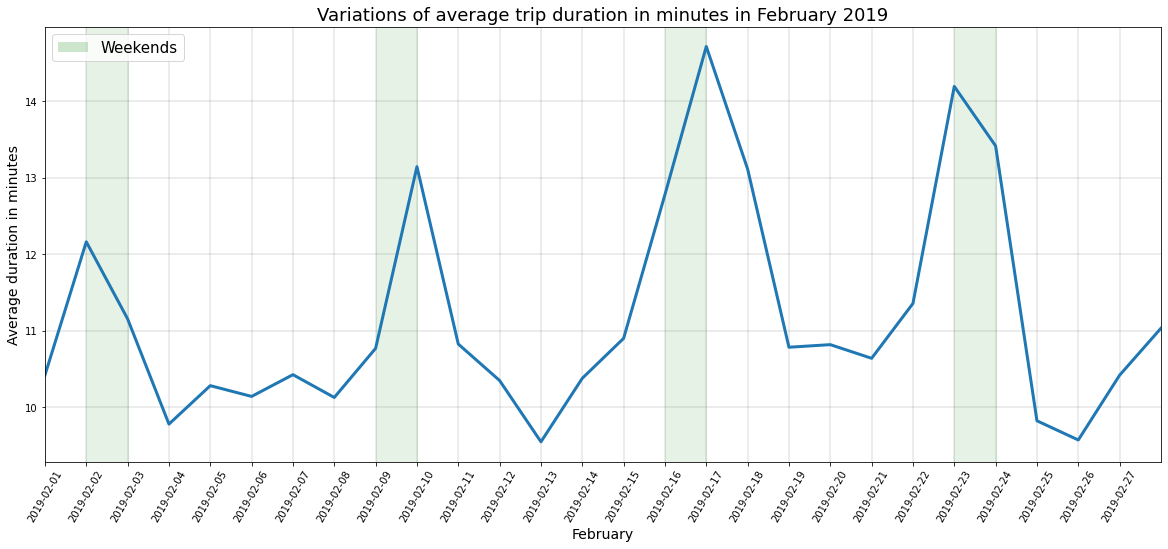

In [45]:
daily_duration_min = gobike_data.groupby('start_date')['duration_min'].mean().reset_index()

plt.figure(figsize=(20,8))
plt.plot(daily_duration_min['start_date'], daily_duration_min['duration_min'], linewidth=3)

plt.title('Variations of average trip duration in minutes in February 2019', size=(18))
plt.xlabel('February',size=(14))
plt.ylabel('Average duration in minutes',size=(14))

x = np.arange(gobike_data['start_date'].min(), gobike_data['start_date'].max(), 1)
plt.xticks(x, rotation = 60)
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.xlim(gobike_data['start_date'].min(), gobike_data['start_date'].max())

plt.axvspan('2019-02-02', '2019-02-03', label="2009 Recession",color="green", alpha=0.1)
plt.axvspan('2019-02-09', '2019-02-10', label="2009 Recession",color="green", alpha=0.1)
plt.axvspan('2019-02-16', '2019-02-17', label="2009 Recession",color="green", alpha=0.1)
plt.axvspan('2019-02-23', '2019-02-24', label="2009 Recession",color="green", alpha=0.1)

plt.legend(handles=[Patch(facecolor='green',label='Weekends',alpha=0.2)],fontsize=15, loc=2);

Interestingly, this timeline looks like the previous one but reversed. Again, we see a pattern of **peaks on average trip durations on weekends** and that **it repeats over the course of the full month**.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this part of the report, we were able to highlight again the **impact of weekdays in trip durations and volume and that this trend applies on a full scale of February 2019**.
><br> We also noticed the impact of subscription mode; **Simple Customers (no subscription) have in average longer trips than Subscribers**, this is less the case with Gender where the trips durations are more evenly distributed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We were able to notice two drops in volume of trips and durations for 02/13 and 02/26 caused by different factor than the ones studied. This might be explained by a study of weather records in that area for instance, (which is not part of this dataset).

## Multivariate Exploration


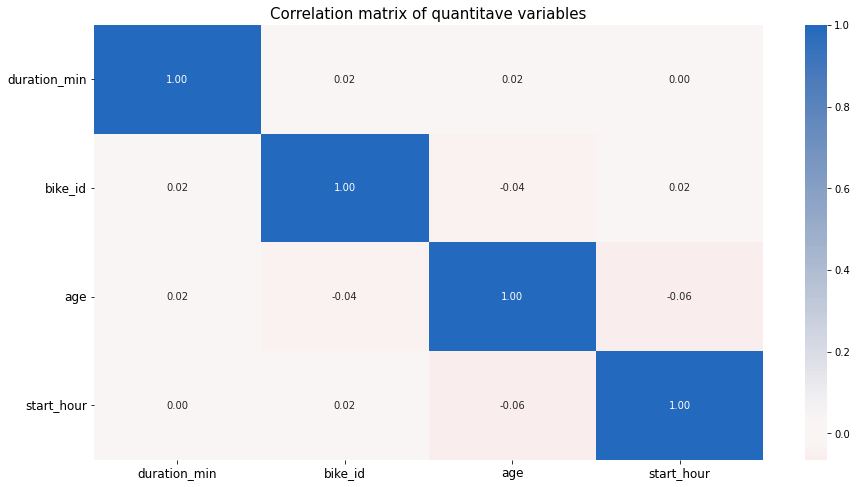

In [30]:
# Looking for possible correlations between quantitative variables in the dataset

corres_lst = ['duration_min','bike_id','age','start_hour']
corres_sbst = gobike_data[gobike_data.columns.intersection(corres_lst)]

plt.figure(figsize=(15,8))
sb.heatmap(corres_sbst.corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0)
plt.title('Correlation matrix of quantitave variables', size=15)
plt.xticks(size=12)
plt.yticks(size=12, rotation=0);

This quick Correlation matrix aimed to spot potential other 'synergies' between quantitative variables that had not been noticed at that point. It was not the case as all correlation scores are close to zero.

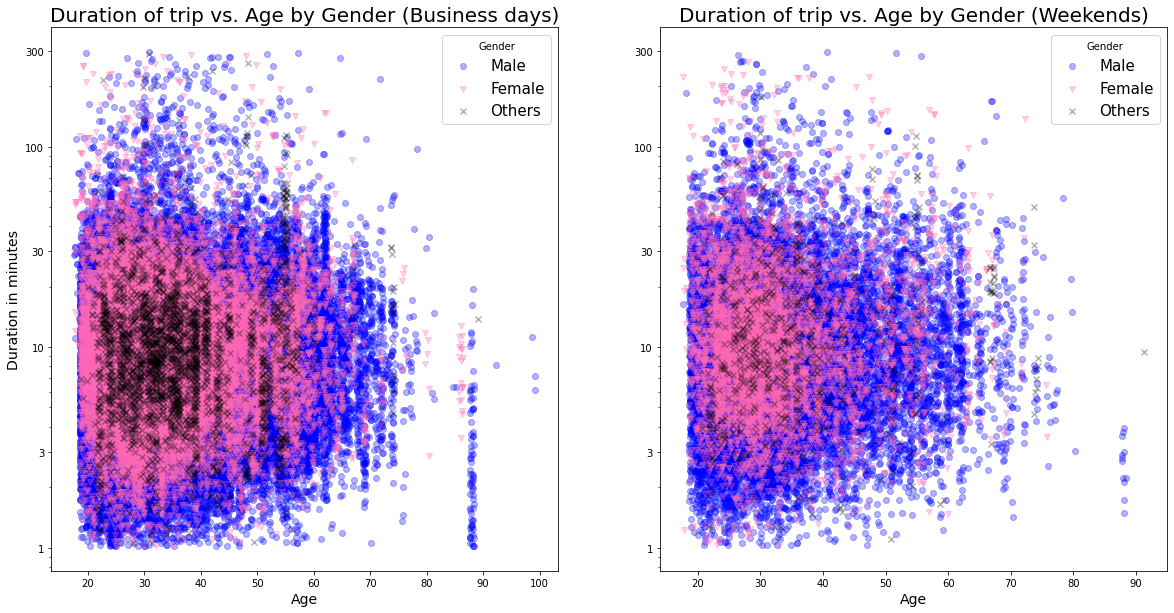

In [47]:
# Create 2 subsets for business days and weekends

gobike_we = gobike_data.query("weekday == 'Weekend'")
gobike_bd = gobike_data.query("weekday == 'Business days'")

gender_markers = [['Male','o','blue'],
               ['Female','v','hotpink'],
               ['Other','x','black']]

ticks = [1, 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)

for gender, marker, color in gender_markers:
    df_cat = gobike_bd[gobike_bd['member_gender'] == gender]
    sb.regplot(data=df_cat, x='age', y='duration_min', marker=marker, color=color, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':0.3})
    plt.legend(['Male','Female','Others'], fontsize=15, title='Gender')
    
plt.xlabel('Age', size=14)
plt.ylabel('Duration in minutes', size=14)
plt.title('Duration of trip vs. Age by Gender (Business days)', size=20)
plt.yscale('log')
plt.yticks(ticks, labels)

plt.subplot(1,2,2)

for gender, marker, color in gender_markers:
    df_cat = gobike_we[gobike_we['member_gender'] == gender]
    sb.regplot(data=df_cat, x='age', y='duration_min', marker=marker, color=color, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':0.3})
    plt.legend(['Male','Female','Others'], fontsize=15, title='Gender')
    
plt.xlabel('Age', size=14)
plt.ylabel('')
plt.title('Duration of trip vs. Age by Gender (Weekends)', size=20)
plt.yscale('log')
plt.yticks(ticks, labels);

In these scatter plots, we tried to cross three different variables; the duration in minutes, user ages and Gender. We also used two different subsets of the dataset; one for Business days and the other for Weekends to make 2 different plots side by side for better comparison. <br>

We can notice again the impact of weekday in biking trends; as **sensibly less Female and Others make trips in Weekends compared to Business days**, while Male have a rather similar usage not really affected by this parameter. <br>

<br> We also can see that the age 'span' of trips is slightly 'larger' on weekends than weekends which shows that weekend trips are more diverse in terms of age.

**Important : In order to make the distribution more visible, we had to use a logarithmic scale for the trip durations.**

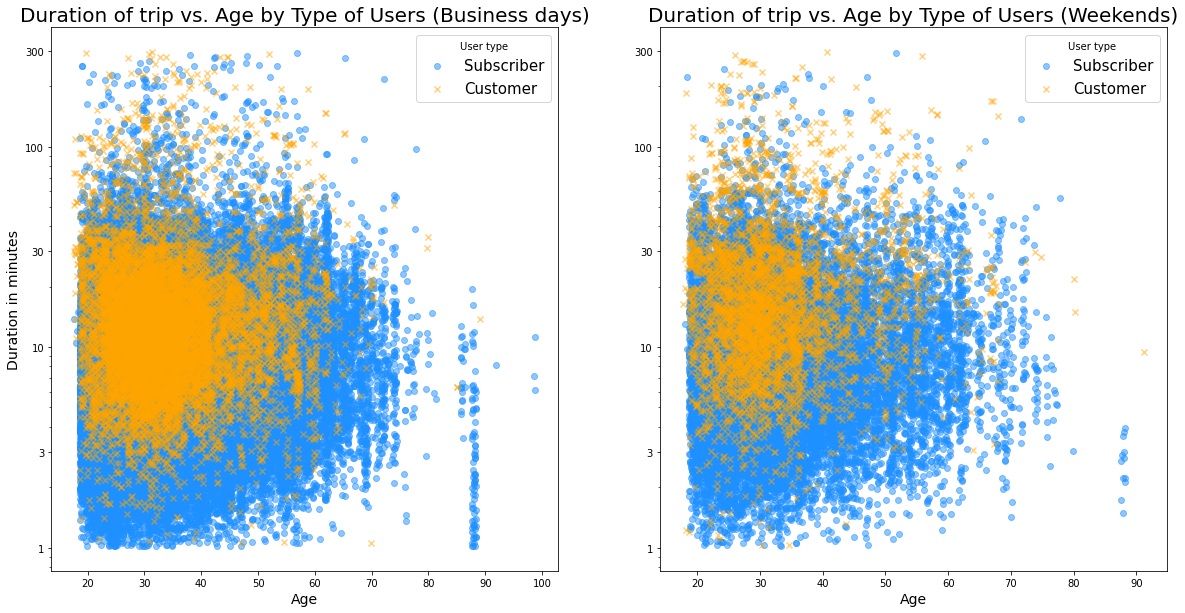

In [48]:
utype_markers = [['Subscriber','o','dodgerblue'],
               ['Customer','x','orange']]

plt.figure(figsize=(20,10))

ticks = [1, 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.subplot(1,2,1)

for utype, marker, color in utype_markers:
    df_cat = gobike_bd[gobike_bd['user_type'] == utype]
    sb.regplot(data=df_cat, x='age', y='duration_min', marker=marker, color=color, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':0.5})
    plt.legend(['Subscriber','Customer'], fontsize=15, title='User type')
    
plt.xlabel('Age', size=14)
plt.ylabel('Duration in minutes', size=14)
plt.title('Duration of trip vs. Age by Type of Users (Business days)', size=20)
plt.yscale('log')
plt.yticks(ticks, labels)

plt.subplot(1,2,2)

for utype, marker, color in utype_markers:
    df_cat = gobike_we[gobike_we['user_type'] == utype]
    sb.regplot(data=df_cat, x='age', y='duration_min', marker=marker, color=color, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':0.5})
    plt.legend(['Subscriber','Customer'], fontsize=15, title='User type')
    
plt.xlabel('Age', size=14)
plt.title('Duration of trip vs. Age by Type of Users (Weekends)', size=20)
plt.ylabel('')
plt.yscale('log')
plt.yticks(ticks, labels);

These scatter plots were made in a similar logic that the previous ones, this time with user types instead of genders.

This reveals that **while the Subscribers habits are not deeply impacted by weekday, significantly less Customers uses the service on weekends**.

**Important : In order to make the distribution more visible, we had to use a logarithmic scale for the trip durations.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part, we were able to see the impact of weekdays in trips durations, broken down by age and genders or user types.<br> This confirmed our previous intuitions that weekdays have an impact on users trends.

### Were there any interesting or surprising interactions between features?

> I've found the trend of having less Customers (non subscribers) trips on weekends counter intuitive as I was expecting weekend trips to be made by more diverse populations (ex: leisure/unplanned trips).

## Conclusions
>Throughout this study, we have been able to 'draw a portrait' of average user of the Go-Bike service on February 2019; 
usually male, subscriber to the service and below its 40's.<br>
Then, we pointed that the weekday variable has an influence on bike rental trends and not in the way you would expact, as trips tends to be be less numerous on weekends but a bit longer in duration.
Finally, we were able to establish that the portrait of go-bike users was not consistant between business days and weekends as more customers (non-subscribers) usethe service out of business days. In the same 'spirit'; less women use the go bike in weekends than business days.